# Examine Clusters

In [1]:
import os
from decouple import config
import second_level_functions as slf
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import re
import statsmodels.api as sm
import scipy.stats as stats
from IPython.display import display
import ptitprince as pt
from statsmodels.stats.multitest import multipletests as multitest

Read in images and get parameter estimates

In [2]:
sig_clusters = ['eft_interaction', 'happy_interaction', 'fear_time']
parameter_estimates = {}
for task_contrast in sig_clusters:
    print('working on task and contrast: ', task_contrast)
    task = task_contrast.split('_')[0]
    contrast = task_contrast.split('_')[1]
    base_dir = config(task)
    path = os.path.join(base_dir, '2ndlevel')
    copes_dir = os.path.join(base_dir, '2ndlevel', 'mixed_model')
    parameter_estimates_df = slf.get_peak_voxel(base_dir, path, copes_dir, contrast)
    parameter_estimates[task_contrast] = parameter_estimates_df

working on task and contrast:  eft_interaction
working on task and contrast:  happy_interaction
working on task and contrast:  fear_time


## Plot and get mean of parameter estimates

Split parameter estimates by group and time point. Then get mean of each group and at in each time point

In [3]:
group_values={
    'an_t1': {},
    'an_t2': {},
    'hc_t1': {},
    'hc_t2': {}
}

for task_interaction in parameter_estimates.keys():
    print('Working on: ', task_interaction)
    an_t1 = parameter_estimates[task_interaction].loc[(parameter_estimates[task_interaction]['group'] == 'AN') 
                                                      & (parameter_estimates[task_interaction]['time_point'] == 't1')].iloc[:, 4:]
    an_t2 = parameter_estimates[task_interaction].loc[(parameter_estimates[task_interaction]['group'] == 'AN') 
                                                     & (parameter_estimates[task_interaction]['time_point'] == 't2')].iloc[:, 4:]    
    hc_t1 = parameter_estimates[task_interaction].loc[(parameter_estimates[task_interaction]['group'] == 'HC') 
                                                    & (parameter_estimates[task_interaction]['time_point'] == 't1')].iloc[:, 4:]
    hc_t2 = parameter_estimates[task_interaction].loc[(parameter_estimates[task_interaction]['group'] == 'HC') 
                                                    & (parameter_estimates[task_interaction]['time_point'] == 't2')].iloc[:, 4:]
    group_values['an_t1'][task_interaction] = [an_t1.mean(), an_t1.std()]
    group_values['an_t2'][task_interaction] = [an_t2.mean(), an_t2.std()]
    group_values['hc_t1'][task_interaction] = [hc_t1.mean(), hc_t1.std()]
    group_values['hc_t2'][task_interaction] = [hc_t2.mean(), hc_t2.std()]

Working on:  eft_interaction
Working on:  happy_interaction
Working on:  fear_time


In [4]:
means_std_df = pd.DataFrame(data={
    'AN T1 mean':  pd.concat((group_values['an_t1']['happy_interaction'][0], 
                              group_values['an_t1']['eft_interaction'][0], 
                              group_values['an_t1']['fear_time'][0])),
    'AN T1 std':  pd.concat((group_values['an_t1']['happy_interaction'][1], 
                             group_values['an_t1']['eft_interaction'][1], 
                             group_values['an_t1']['fear_time'][1])),
    'HC T1 mean':  pd.concat((group_values['hc_t1']['happy_interaction'][0], 
                              group_values['hc_t1']['eft_interaction'][0], 
                              group_values['hc_t1']['fear_time'][0])),
    'HC T1 std':  pd.concat((group_values['hc_t1']['happy_interaction'][1], 
                             group_values['hc_t1']['eft_interaction'][1], 
                             group_values['hc_t1']['fear_time'][1])),
    'AN T2 mean':  pd.concat((group_values['an_t2']['happy_interaction'][0], 
                              group_values['an_t2']['eft_interaction'][0], 
                              group_values['an_t2']['fear_time'][0])),
    'AN T2 std':  pd.concat((group_values['an_t2']['happy_interaction'][1], 
                             group_values['an_t2']['eft_interaction'][1], 
                             group_values['an_t2']['fear_time'][1])),
    'HC T2 mean':  pd.concat((group_values['hc_t2']['happy_interaction'][0], 
                              group_values['hc_t2']['eft_interaction'][0], 
                              group_values['hc_t2']['fear_time'][0])),
    'HC T2 std':  pd.concat((group_values['hc_t2']['happy_interaction'][1], 
                             group_values['hc_t2']['eft_interaction'][1], 
                             group_values['hc_t2']['fear_time'][1])),
                   }).T
means_std_df

,Vermis_4_5,Right_Frontal_Operculum_Cortex,Right_Frontal_Pole,Right_Planum_Temporale,Right_Putamen,Left_Precentral_Gyrus1,Left_Precentral_Gyrus2,Frontal_Sup_2_L
AN T1 mean,1.808552,3.164361,4.242870,1.868615,1.430196,5.701842,6.741921,1.065302
AN T1 std,1.771879,2.963295,5.291274,1.896685,1.021039,6.002200,6.937675,0.805804
HC T1 mean,2.971905,9.701787,13.826612,4.624110,2.742488,15.612160,17.317799,1.648148
HC T1 std,2.551519,14.884332,24.380634,5.393777,1.990463,20.673819,27.353666,1.741508
AN T2 mean,2.511060,7.554090,7.467186,2.797979,2.088970,13.617514,13.107894,1.543054
AN T2 std,2.332078,8.752158,10.988969,2.854433,1.781813,15.493722,14.074580,2.385784
HC T2 mean,1.221835,4.646283,5.083607,2.572464,1.520716,8.758195,8.423120,4.173595
HC T2 std,0.827403,5.575875,5.799491,3.242436,1.275471,7.461505,8.766540,5.511991


Plot parameter estimates

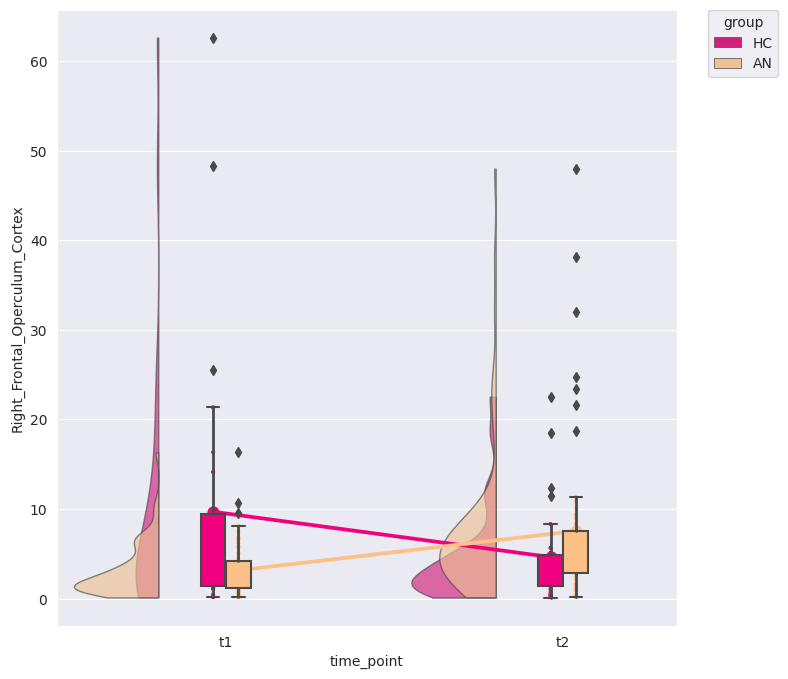

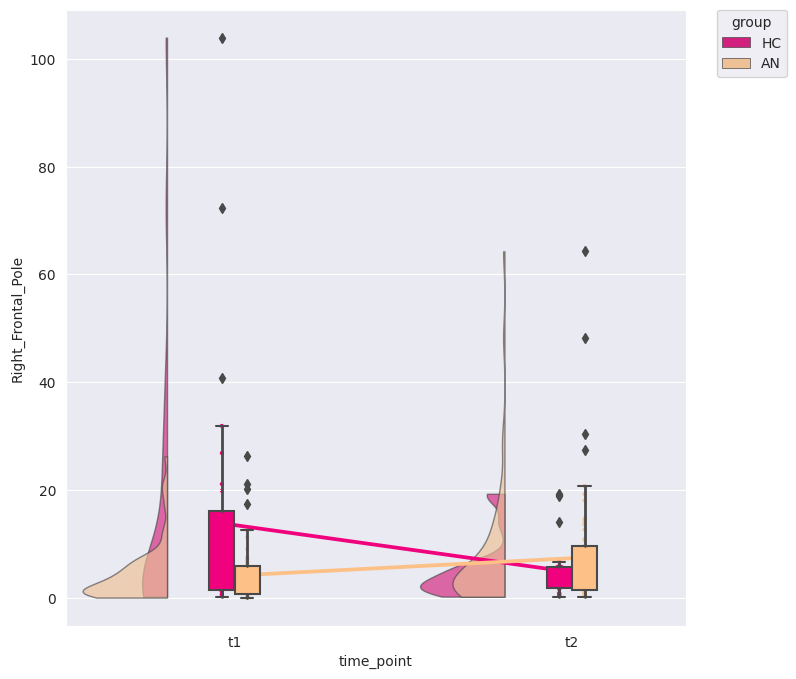

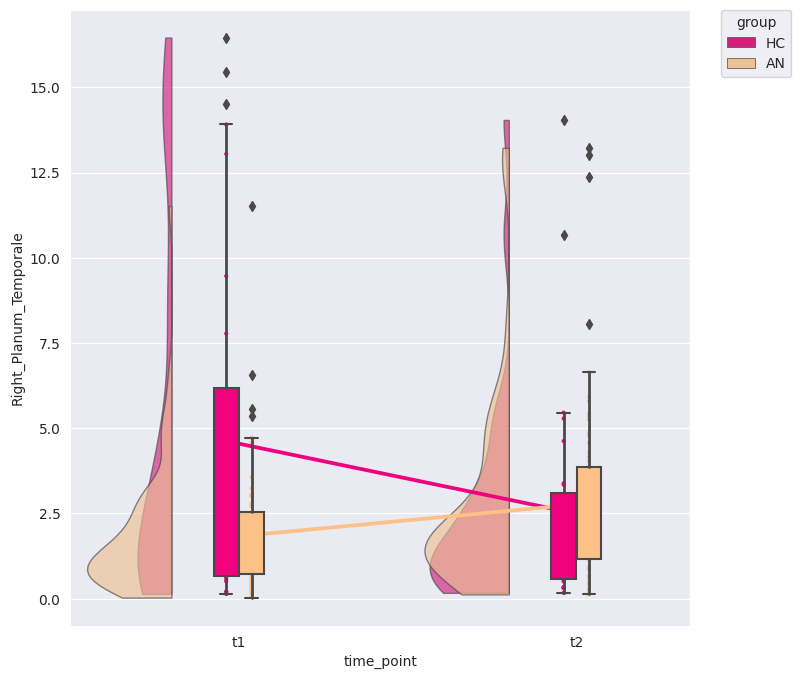

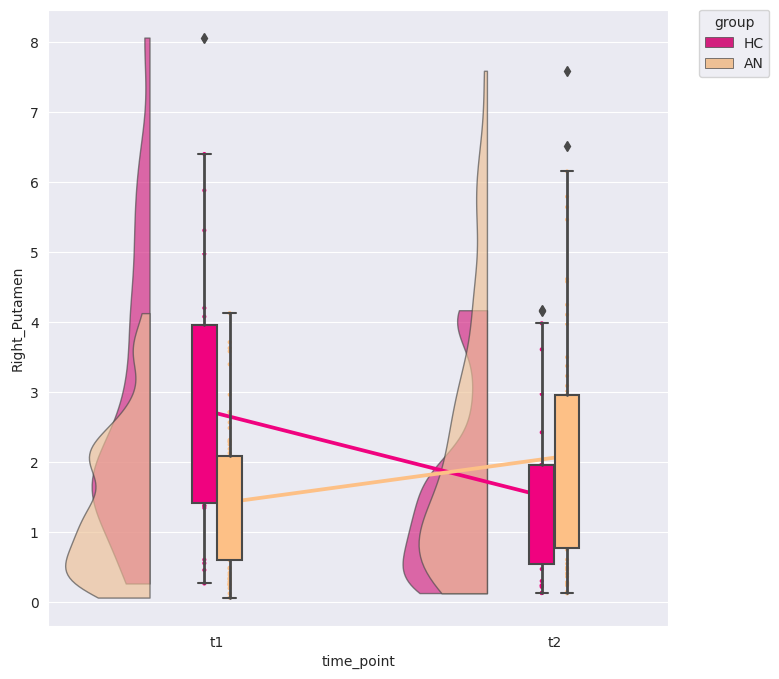

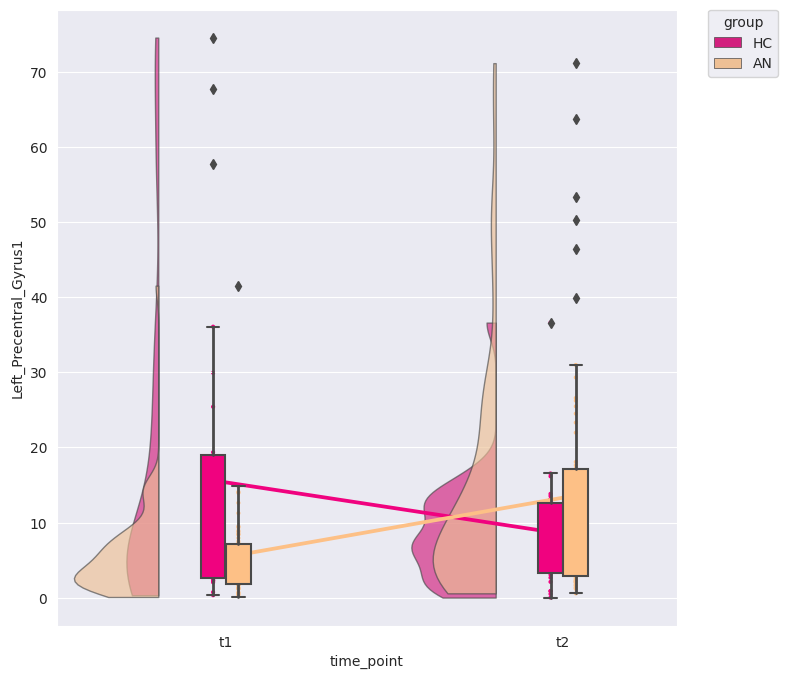

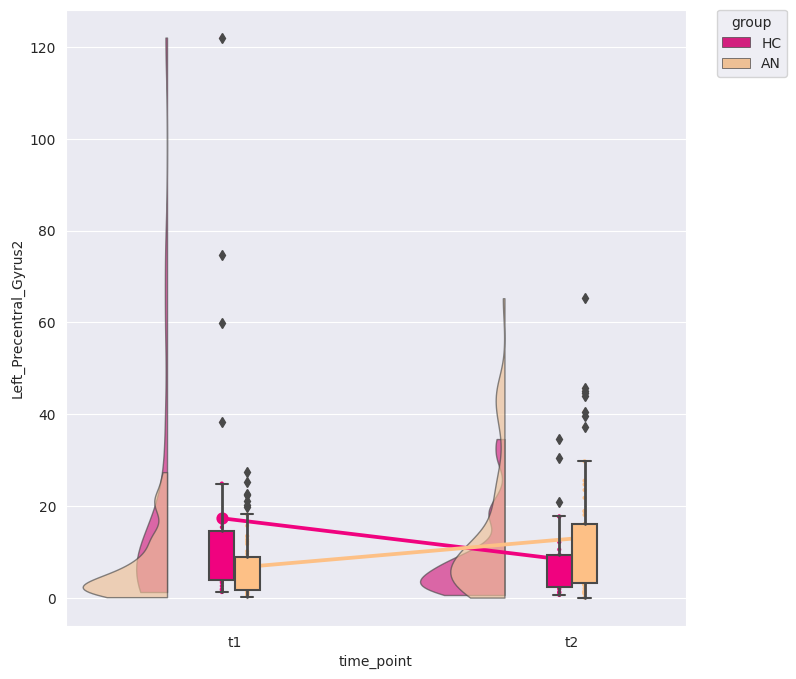

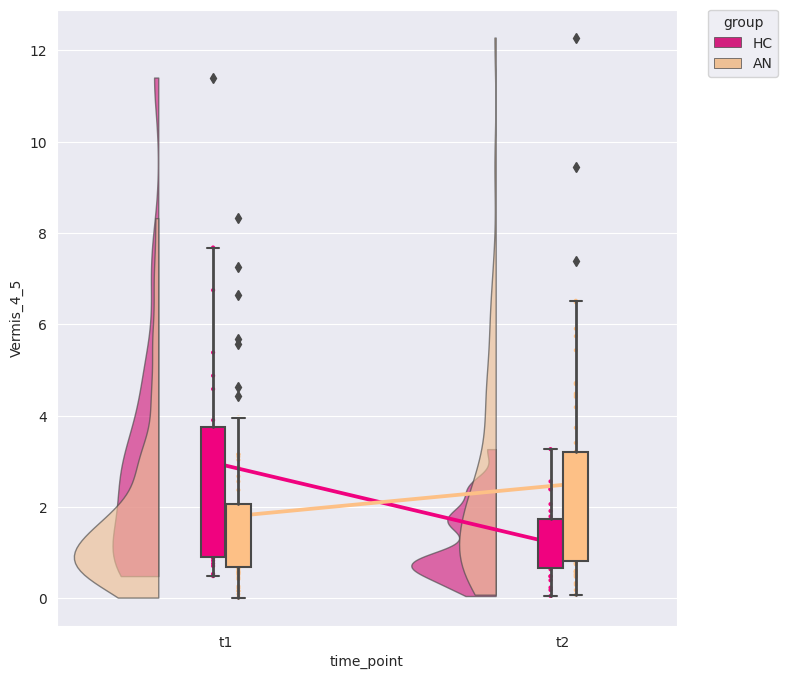

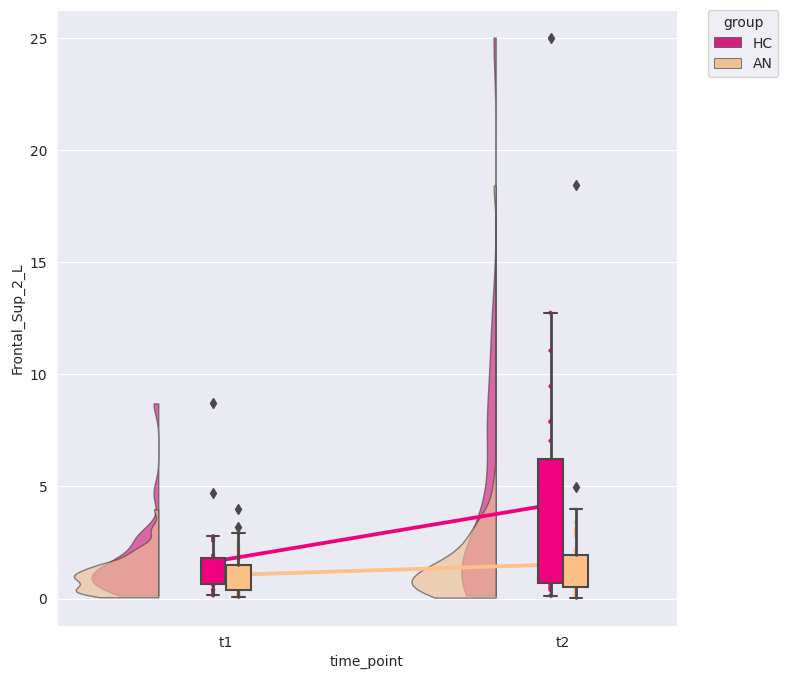

In [5]:
for task in parameter_estimates.keys():
    df = parameter_estimates[task].drop(['sub', 'time_point', 'id', 'group', ],axis=1)
    for cluster in df.columns:
        fig,ax = plt.subplots(1,1, figsize=(8, 8))
        pt.RainCloud(
            x="time_point", 
            y=cluster, 
            hue="group", 
            data=parameter_estimates[task], 
            palette='Accent_r', 
            alpha=.65, 
            dodge=True, 
            scale="area",
            ax=ax,
            width_viol=.5,
            jitter=0,
            pointplot = True,
            bw=.3
             )



## Linear Mixed Model

Change reference level of model by changing the name of AN to participant with AN (pAN) and HC to Control

In [6]:
neuroimaging_behavioural_measures = pd.read_csv(os.path.join(config('task_fmri'), 'neuroimaging_behavioural_measures.csv'))
beh_measures = pd.concat((
                        pd.melt(neuroimaging_behavioural_measures, id_vars='t1', value_vars=['edeq_global_score_t1', 'edeq_global_score_t2']).rename(columns={'value': 'edeq', 
                                                                                               'variable': 'time_point',
                                                                                               't1': 'subject'
                                                                                               }),
                        pd.melt(neuroimaging_behavioural_measures, id_vars='t1', value_vars=['anxiety_t1', 'anxiety_t2']).rename(columns={'value': 'hads_anxiety', 
                                                                                               })['hads_anxiety'],
                        pd.melt(neuroimaging_behavioural_measures, id_vars='t1', value_vars=['depression_t1', 'depression_t2']).rename(columns={'value': 'hads_depression', 
                                                                                               })['hads_depression'],
                        pd.melt(neuroimaging_behavioural_measures, id_vars='t1', value_vars=['bmi_t1', 'bmi_t2']).rename(columns={'value': 'bmi', 
                                                                                               })['bmi'],
                        pd.melt(neuroimaging_behavioural_measures, id_vars='t1', value_vars=['age_t1', 'age_t2']).rename(columns={'value': 'age', 
                                                                                               })['age'],

                        

), axis=1).sort_values(by='subject').reset_index(drop=True)
beh_measures['time_point'] = beh_measures['time_point'].apply(lambda time: 't1' if 'edeq_global_score_t1' in time else 't2')
beh_measures = beh_measures.drop(index=[164, 165])


In [7]:
lmm = {}
for task_interaction in parameter_estimates.keys():
    parameter_estimates[task_interaction]['group'] = parameter_estimates[task_interaction]['group'].apply(lambda group: 'pAN' if group == 'AN' else 'Control')
    parameter_estimates[task_interaction]['id'] = parameter_estimates[task_interaction]['id'].apply(lambda id: re.sub('/ess_0004.nii', '', id))
    organised_df = pd.concat((parameter_estimates[task_interaction][parameter_estimates[task_interaction]['id'].str.contains('G')].sort_values(by='id', ascending=True),
                          parameter_estimates[task_interaction][parameter_estimates[task_interaction]['id'].str.contains('B')].sort_values(by='id', ascending=True))).reset_index(drop=True)
    lmm_df = pd.concat((beh_measures.sort_values(by=['time_point', 'subject']).reset_index(drop=True), 
                        organised_df.drop('time_point', axis=1)), axis=1).drop(['sub', 'id'], axis=1).sort_values(by='subject').reset_index(drop=True)
    lmm[task_interaction] = lmm_df

define and fit the model

In [8]:
from IPython.display import display

for task in lmm.keys():
    for cluster in lmm[task].drop(['subject', 'time_point', 'edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age', 'group', ],axis=1).columns:
    
        model = smf.mixedlm(f"{cluster} ~ time_point + group + group*time_point", 
                            lmm[task], 
                            groups=lmm[task]["subject"]).fit()
        model.summary()
        summ = pd.concat((model.params.to_frame().T.rename(index={0: 'params'}), 
                   model.bse_fe.to_frame().T.rename(index={0: 'std'}),
                   model.conf_int().T.drop('Group Var', axis=1).rename(index={0: 'CI_0.025', 1: 'CI_0.975'}))).dropna(axis=1)
        print('-'*100)
        print(cluster)
        display(summ)

----------------------------------------------------------------------------------------------------
Right_Frontal_Operculum_Cortex


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,9.701787,-5.055503,-6.537426,9.445232
std,1.573501,2.182521,1.871993,2.596544
CI_0.025,6.617782,-9.333166,-10.206465,4.356099
CI_0.975,12.785792,-0.777841,-2.868387,14.534365


----------------------------------------------------------------------------------------------------
Right_Frontal_Pole


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,13.826612,-8.743005,-9.583742,11.967322
std,2.306265,3.142757,2.743762,3.738936
CI_0.025,9.306416,-14.902695,-14.961417,4.639142
CI_0.975,18.346809,-2.583315,-4.206067,19.295501


----------------------------------------------------------------------------------------------------
Right_Planum_Temporale


/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,4.624110,-2.051646,-2.755494,2.981010
std,0.605437,0.856218,0.720289,1.018642
CI_0.025,3.437474,-3.729802,-4.167234,0.984508
CI_0.975,5.810745,-0.373490,-1.343755,4.977511


----------------------------------------------------------------------------------------------------
Right_Putamen


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,2.742488,-1.221772,-1.312292,1.880547
std,0.292295,0.410038,0.347743,0.487822
CI_0.025,2.169601,-2.025431,-1.993856,0.924433
CI_0.975,3.315376,-0.418113,-0.630728,2.836660


----------------------------------------------------------------------------------------------------
Left_Precentral_Gyrus1


/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,15.612159,-6.853963,-9.910318,14.769635
std,2.493998,3.527031,2.967108,4.196106
CI_0.025,10.724012,-13.766817,-15.725743,6.545418
CI_0.975,20.500306,0.058890,-4.094892,22.993853


----------------------------------------------------------------------------------------------------
Left_Precentral_Gyrus2


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,17.317799,-8.894680,-10.575879,15.260652
std,2.767030,3.708128,3.291934,4.411558
CI_0.025,11.894521,-16.162478,-17.027950,6.614157
CI_0.975,22.741078,-1.626882,-4.123807,23.907147


----------------------------------------------------------------------------------------------------
Vermis_4_5


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,2.971905,-1.750070,-1.163353,2.452579
std,0.389171,0.523789,0.462997,0.623152
CI_0.025,2.209143,-2.776678,-2.070810,1.231224
CI_0.975,3.734666,-0.723461,-0.255897,3.673934


----------------------------------------------------------------------------------------------------
Frontal_Sup_2_L


,Intercept,time_point[T.t2],group[T.pAN],group[T.pAN]:time_point[T.t2]
params,1.648148,2.525447,-0.582846,-2.047695
std,0.512123,0.710913,0.609272,0.845773
CI_0.025,0.644406,1.132082,-1.776998,-3.705379
CI_0.975,2.651891,3.918811,0.611306,-0.390010


In [9]:
lmm_models = {}
for task in lmm.keys():
    for cluster in lmm[task].drop(['subject', 'time_point', 'edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age', 'group', ],axis=1).columns:
        lmm[task]['cluster_trans'] = np.log10(lmm[task][cluster])
        cluster_model = smf.mixedlm("""
                    cluster_trans ~ edeq + hads_anxiety + hads_depression + bmi + age + time_point 
                    + edeq:time_point + hads_anxiety:time_point + hads_depression:time_point + bmi:time_point + age:time_point
                    """, groups='subject' , data=lmm[task][lmm[task]['subject'].str.contains('G2')].reset_index(drop=True).dropna()).fit()
        lmm_models[f'{task}_{cluster}'] = cluster_model

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [10]:
fwe = {
    'intercept_fwe': multitest([lmm_models[cluster].pvalues['Intercept'] for cluster in lmm_models.keys()]),
    'time_fwe': multitest([lmm_models[cluster].pvalues['time_point[T.t2]'] for cluster in lmm_models.keys()]),
    'edeq_fwe': multitest([lmm_models[cluster].pvalues['edeq'] for cluster in lmm_models.keys()]),
    'edeq_interaction_fwe': multitest([lmm_models[cluster].pvalues['edeq:time_point[T.t2]'] for cluster in lmm_models.keys()]),
    'hads_anxiety_fwe': multitest([lmm_models[cluster].pvalues['hads_anxiety'] for cluster in lmm_models.keys()]),
    'hads_anxiety_interaction_fwe': multitest([lmm_models[cluster].pvalues['hads_anxiety:time_point[T.t2]'] for cluster in lmm_models.keys()]),
    'hads_depression_fwe': multitest([lmm_models[cluster].pvalues['hads_depression'] for cluster in lmm_models.keys()]),
    'hads_depression_interaction_fwe': multitest([lmm_models[cluster].pvalues['hads_depression:time_point[T.t2]'] for cluster in lmm_models.keys()]),
    'bmi_fwe': multitest([lmm_models[cluster].pvalues['bmi'] for cluster in lmm_models.keys()]),
    'bmi_interaction_fwe': multitest([lmm_models[cluster].pvalues['bmi:time_point[T.t2]'] for cluster in lmm_models.keys()]),
    'age_fwe': multitest([lmm_models[cluster].pvalues['age'] for cluster in lmm_models.keys()]),
    'age_interaction_fwe': multitest([lmm_models[cluster].pvalues['age:time_point[T.t2]'] for cluster in lmm_models.keys()])
}
for fwe_correction in fwe:
    if True in fwe[fwe_correction][0]:
        print(fwe_correction, fwe[fwe_correction])

intercept_fwe (array([False, False, False, False,  True, False, False, False]), array([0.99010162, 0.99976372, 0.99976372, 0.99976372, 0.02003312,
       0.98693102, 0.8939157 , 0.99976372]), 0.006391150954545011, 0.00625)


In [11]:
def r2(cluster_model, df) -> dict:
    var_resid = cluster_model.scale
    var_random_effect = float(cluster_model.cov_re.iloc[0])
    var_fixed_effect = cluster_model.predict(df[df['subject'].str.contains('G2')].reset_index(drop=True).dropna()).var()
    total_var = var_fixed_effect + var_random_effect + var_resid
    marginal_r2 = var_fixed_effect / total_var
    conditional_r2 = (var_fixed_effect + var_random_effect) / total_var
    return {'conditional_r2': conditional_r2,
                'marginal_r2': marginal_r2}

eft_interaction_Right_Frontal_Operculum_Cortex


NormaltestResult(statistic=2.4841279902106574, pvalue=0.2887875463051532)

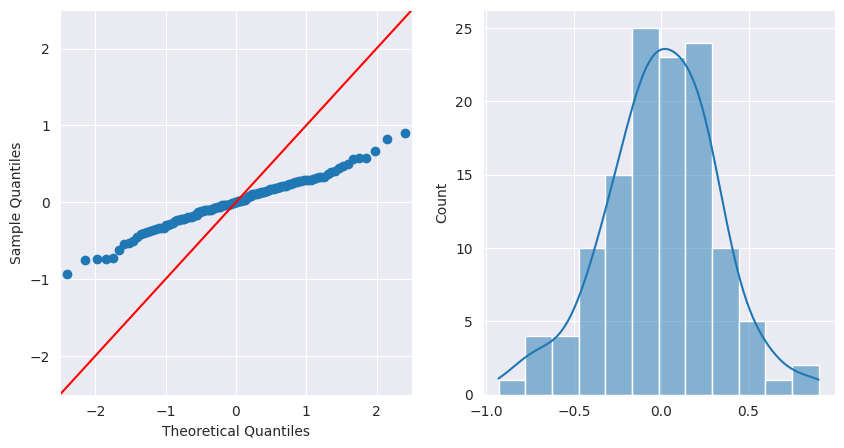

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.1410       
Min. group size:        1            Log-Likelihood:          -97.9788     
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -0.248    0.477 -0.521 0.603 -1.183  0.687
time_point[T.t2]                  0.600    0.663  0.906 0.365 -0.699  1.900
edeq                              0.030    0.038  0.808 0.419 -0.043  0.104
edeq:time_point[T.t2]             0.005    0.053  0.091 0.928 -0.100  0.109
hads_anxiety                     -0.030    0.018 -1.736 0.083 -0.065  0.004
hads_anxiety:time_point[T.t2]     0.049    0.022  2.196 0.028  0.005  0.092
hads_depression                   0.020    0.019  1.027 0.305 -0.018  0.058
hads_depression:time_point[T.t2] -0.019    0.023 -0.823 0.410 -0.065  0.027
bmi                               0.011    0.021  0.539 0.590 -0.030  0.053
bmi:time_point[T.t2]              0.017    0.027  0.635 0.526 -0.036  0.071
age                               0.024    0.018  1.363 0.173 -0.010  0.058
age:time_point[T.t2]             -0.048    0.021 -2.281 0.023 -0.089 -0.007
subject Var                       0.043    0.086                           
===========================================================================

"""

marginal_r2:  0.21632461856370622 

----------------------------------------------------------------------------------------------------
eft_interaction_Right_Frontal_Pole


NormaltestResult(statistic=2.7459207900462, pvalue=0.2533558149653363)

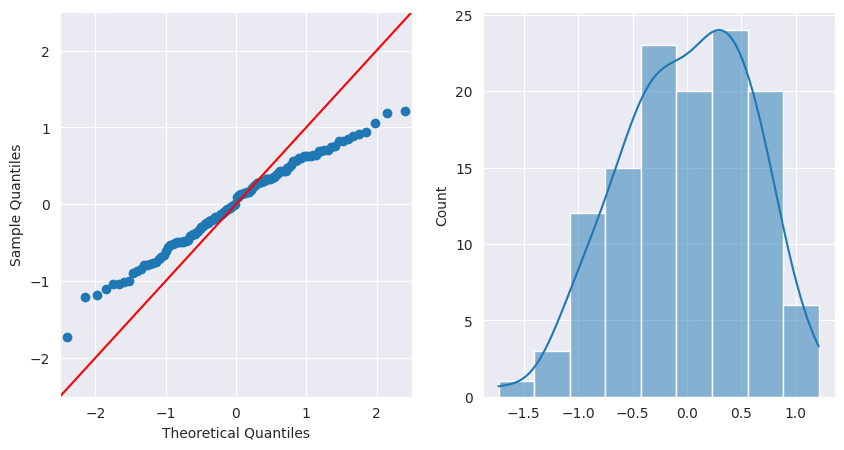

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.3761       
Min. group size:        1            Log-Likelihood:          -139.4989    
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.063    0.690  0.092 0.927 -1.289  1.415
time_point[T.t2]                 -0.168    1.015 -0.165 0.869 -2.157  1.821
edeq                              0.081    0.055  1.472 0.141 -0.027  0.189
edeq:time_point[T.t2]            -0.041    0.077 -0.536 0.592 -0.193  0.110
hads_anxiety                     -0.028    0.026 -1.085 0.278 -0.078  0.022
hads_anxiety:time_point[T.t2]     0.032    0.034  0.953 0.340 -0.034  0.098
hads_depression                   0.013    0.028  0.473 0.636 -0.042  0.069
hads_depression:time_point[T.t2] -0.036    0.036 -1.027 0.304 -0.106  0.033
bmi                              -0.009    0.031 -0.283 0.777 -0.070  0.052
bmi:time_point[T.t2]              0.029    0.040  0.716 0.474 -0.050  0.107
age                               0.017    0.025  0.667 0.505 -0.033  0.067
age:time_point[T.t2]             -0.004    0.034 -0.119 0.905 -0.070  0.062
subject Var                       0.001    0.089                           
===========================================================================

"""

marginal_r2:  0.0895833127456941 

----------------------------------------------------------------------------------------------------
eft_interaction_Right_Planum_Temporale


NormaltestResult(statistic=6.69874131860842, pvalue=0.03510644106204897)

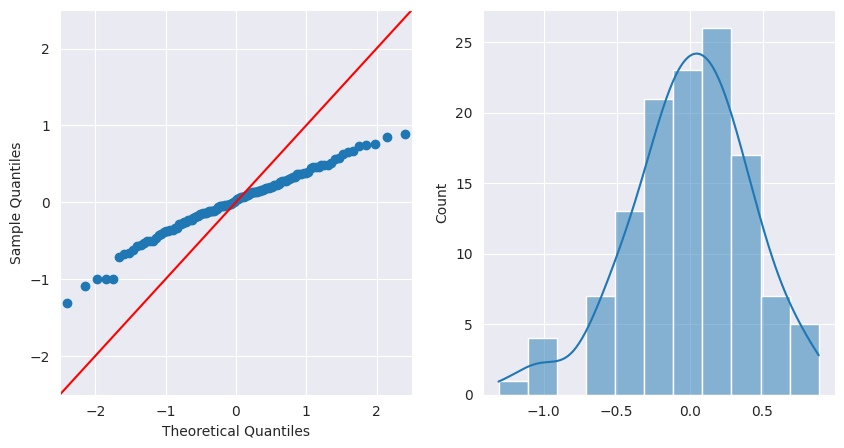

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.1991       
Min. group size:        1            Log-Likelihood:          -107.3577    
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.047    0.519  0.090 0.928 -0.971  1.064
time_point[T.t2]                 -0.525    0.751 -0.699 0.484 -1.996  0.946
edeq                             -0.056    0.042 -1.355 0.175 -0.138  0.025
edeq:time_point[T.t2]             0.133    0.059  2.268 0.023  0.018  0.248
hads_anxiety                     -0.001    0.019 -0.027 0.978 -0.038  0.037
hads_anxiety:time_point[T.t2]    -0.007    0.025 -0.284 0.776 -0.055  0.041
hads_depression                   0.009    0.021  0.448 0.654 -0.032  0.051
hads_depression:time_point[T.t2] -0.007    0.026 -0.265 0.791 -0.059  0.045
bmi                               0.026    0.023  1.139 0.255 -0.019  0.072
bmi:time_point[T.t2]              0.001    0.029  0.031 0.976 -0.057  0.059
age                              -0.018    0.019 -0.966 0.334 -0.056  0.019
age:time_point[T.t2]              0.023    0.025  0.944 0.345 -0.025  0.072
subject Var                       0.014    0.069                           
===========================================================================

"""

marginal_r2:  0.10529646268098128 

----------------------------------------------------------------------------------------------------
eft_interaction_Right_Putamen


NormaltestResult(statistic=7.806488128962743, pvalue=0.02017635177723967)

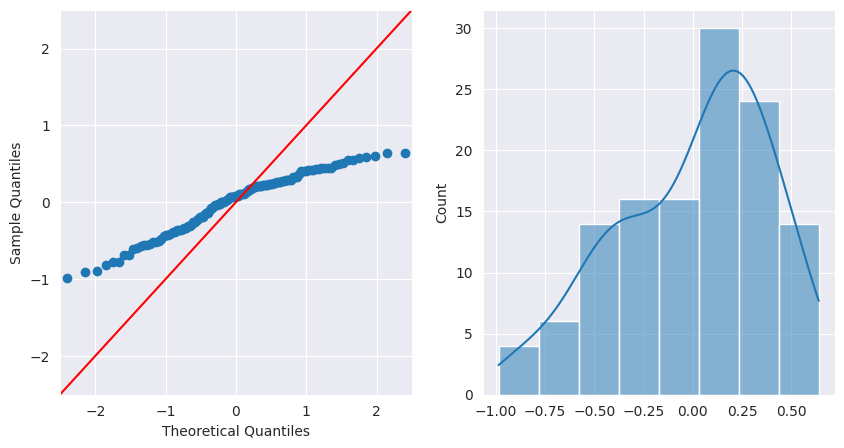

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.1725       
Min. group size:        1            Log-Likelihood:          -98.1987     
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -0.074    0.477 -0.156 0.876 -1.008  0.860
time_point[T.t2]                  0.159    0.698  0.227 0.820 -1.210  1.527
edeq                             -0.031    0.038 -0.826 0.409 -0.106  0.043
edeq:time_point[T.t2]             0.099    0.054  1.833 0.067 -0.007  0.205
hads_anxiety                     -0.007    0.018 -0.380 0.704 -0.041  0.028
hads_anxiety:time_point[T.t2]    -0.002    0.023 -0.107 0.915 -0.047  0.042
hads_depression                   0.027    0.020  1.359 0.174 -0.012  0.066
hads_depression:time_point[T.t2] -0.002    0.025 -0.073 0.942 -0.050  0.046
bmi                               0.003    0.021  0.160 0.873 -0.038  0.045
bmi:time_point[T.t2]              0.001    0.027  0.033 0.974 -0.053  0.055
age                              -0.001    0.018 -0.071 0.944 -0.036  0.033
age:time_point[T.t2]             -0.009    0.023 -0.412 0.680 -0.054  0.035
subject Var                       0.008    0.063                           
===========================================================================

"""

marginal_r2:  0.09051309039635075 

----------------------------------------------------------------------------------------------------
eft_interaction_Left_Precentral_Gyrus1


NormaltestResult(statistic=1.148027652652717, pvalue=0.5632600672506516)

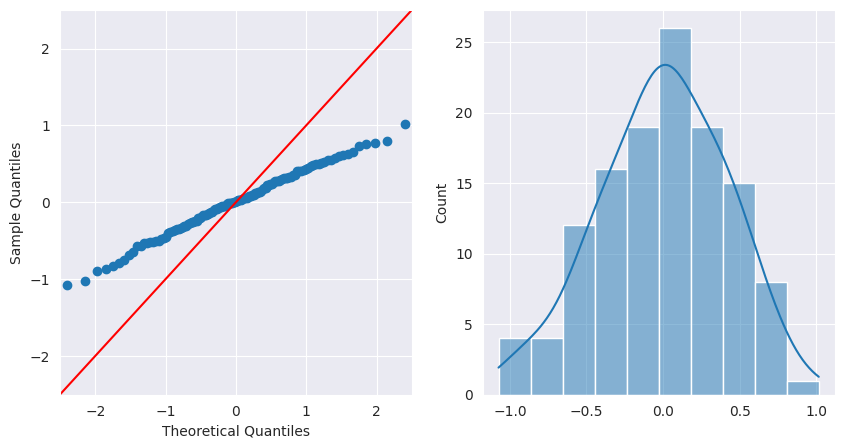

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.2060       
Min. group size:        1            Log-Likelihood:          -109.7339    
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         1.617    0.536  3.020 0.003  0.568  2.667
time_point[T.t2]                 -0.471    0.765 -0.615 0.538 -1.971  1.029
edeq                             -0.018    0.042 -0.417 0.676 -0.100  0.065
edeq:time_point[T.t2]             0.004    0.060  0.059 0.953 -0.113  0.121
hads_anxiety                      0.009    0.020  0.442 0.658 -0.030  0.047
hads_anxiety:time_point[T.t2]    -0.027    0.025 -1.071 0.284 -0.077  0.022
hads_depression                  -0.009    0.022 -0.406 0.685 -0.052  0.034
hads_depression:time_point[T.t2]  0.013    0.028  0.453 0.650 -0.042  0.067
bmi                              -0.024    0.024 -1.001 0.317 -0.072  0.023
bmi:time_point[T.t2]              0.042    0.030  1.382 0.167 -0.017  0.101
age                              -0.031    0.019 -1.591 0.112 -0.069  0.007
age:time_point[T.t2]              0.014    0.025  0.561 0.575 -0.035  0.063
subject Var                       0.016    0.080                           
===========================================================================

"""

marginal_r2:  0.16900283797242163 

----------------------------------------------------------------------------------------------------
eft_interaction_Left_Precentral_Gyrus2


NormaltestResult(statistic=14.67392675736429, pvalue=0.0006510244370935329)

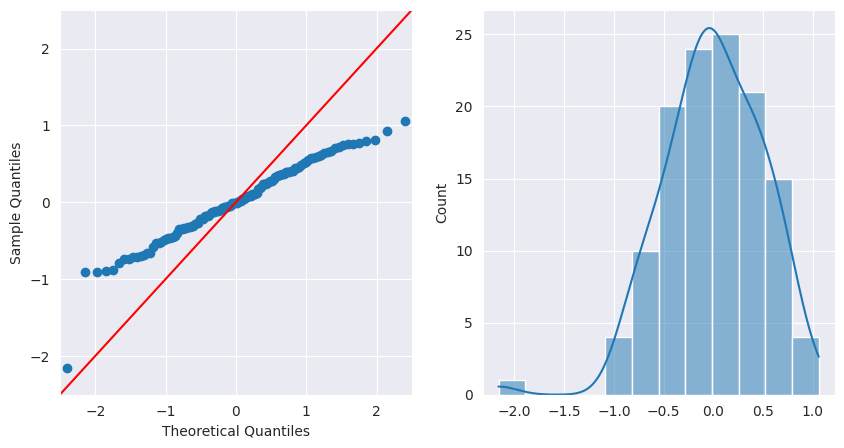

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.2700       
Min. group size:        1            Log-Likelihood:          -120.7503    
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.394    0.605  0.652 0.515 -0.791  1.579
time_point[T.t2]                  0.493    0.865  0.570 0.569 -1.203  2.188
edeq                              0.094    0.047  2.009 0.045  0.002  0.185
edeq:time_point[T.t2]            -0.102    0.066 -1.549 0.121 -0.231  0.027
hads_anxiety                     -0.024    0.022 -1.085 0.278 -0.066  0.019
hads_anxiety:time_point[T.t2]    -0.005    0.028 -0.167 0.868 -0.060  0.050
hads_depression                  -0.017    0.024 -0.696 0.486 -0.064  0.030
hads_depression:time_point[T.t2]  0.039    0.030  1.304 0.192 -0.020  0.098
bmi                              -0.009    0.028 -0.310 0.756 -0.063  0.046
bmi:time_point[T.t2]              0.045    0.034  1.333 0.182 -0.021  0.112
age                               0.023    0.021  1.053 0.292 -0.019  0.065
age:time_point[T.t2]             -0.047    0.029 -1.652 0.099 -0.103  0.009
subject Var                       0.000    0.077                           
===========================================================================

"""

marginal_r2:  0.1471486490084918 

----------------------------------------------------------------------------------------------------
happy_interaction_Vermis_4_5


NormaltestResult(statistic=10.825718208667654, pvalue=0.004458873584696254)

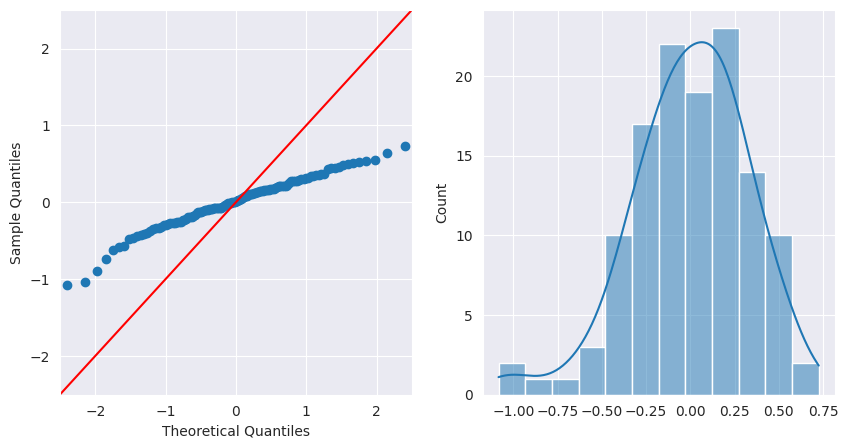

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.1518       
Min. group size:        1            Log-Likelihood:          -104.2822    
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.562    0.514  1.093 0.274 -0.445  1.569
time_point[T.t2]                 -0.249    0.699 -0.356 0.722 -1.618  1.121
edeq                              0.013    0.042  0.305 0.760 -0.069  0.095
edeq:time_point[T.t2]             0.014    0.060  0.228 0.820 -0.104  0.131
hads_anxiety                     -0.004    0.019 -0.196 0.844 -0.040  0.033
hads_anxiety:time_point[T.t2]    -0.006    0.024 -0.254 0.799 -0.052  0.040
hads_depression                   0.033    0.021  1.601 0.109 -0.007  0.074
hads_depression:time_point[T.t2] -0.021    0.025 -0.841 0.400 -0.069  0.028
bmi                              -0.005    0.023 -0.225 0.822 -0.049  0.039
bmi:time_point[T.t2]              0.013    0.029  0.438 0.662 -0.044  0.069
age                              -0.035    0.019 -1.893 0.058 -0.072  0.001
age:time_point[T.t2]              0.023    0.022  1.050 0.294 -0.020  0.066
subject Var                       0.056    0.102                           
===========================================================================

"""

marginal_r2:  0.09007721042525764 

----------------------------------------------------------------------------------------------------
fear_time_Frontal_Sup_2_L


NormaltestResult(statistic=5.368294614110732, pvalue=0.06827939053547631)

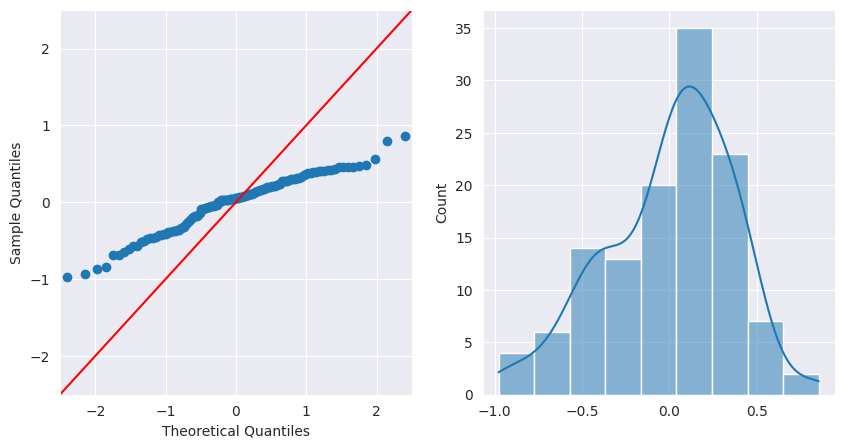

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                  MixedLM      Dependent Variable:      cluster_trans
No. Observations:       124          Method:                  REML         
No. Groups:             65           Scale:                   0.1711       
Min. group size:        1            Log-Likelihood:          -106.2253    
Max. group size:        2            Converged:               Yes          
Mean group size:        1.9                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -0.038    0.512 -0.075 0.940 -1.042  0.965
time_point[T.t2]                  1.168    0.720  1.621 0.105 -0.244  2.580
edeq                              0.059    0.041  1.457 0.145 -0.020  0.138
edeq:time_point[T.t2]            -0.036    0.058 -0.618 0.536 -0.149  0.078
hads_anxiety                     -0.010    0.019 -0.523 0.601 -0.047  0.027
hads_anxiety:time_point[T.t2]    -0.004    0.024 -0.159 0.874 -0.051  0.044
hads_depression                   0.013    0.021  0.638 0.523 -0.028  0.054
hads_depression:time_point[T.t2] -0.015    0.026 -0.589 0.556 -0.065  0.035
bmi                              -0.013    0.023 -0.569 0.569 -0.057  0.031
bmi:time_point[T.t2]             -0.004    0.029 -0.151 0.880 -0.061  0.052
age                              -0.003    0.019 -0.174 0.862 -0.040  0.034
age:time_point[T.t2]             -0.030    0.023 -1.315 0.188 -0.076  0.015
subject Var                       0.041    0.082                           
===========================================================================

"""

marginal_r2:  0.08776465926272488 

----------------------------------------------------------------------------------------------------


In [12]:
for cluster_model in lmm_models.keys():
    print(cluster_model)
    display(stats.normaltest(lmm_models[cluster_model].resid))
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    fig = sm.qqplot(lmm_models[cluster_model].resid, line='45', ax=ax[0])
    sns.histplot(lmm_models[cluster_model].resid, ax=ax[1],  kde=True)
    plt.show()
    display(lmm_models[cluster_model].summary())
    task_cluster = cluster_model.split('_')
    task = task_cluster[0] + '_' + task_cluster[1]
    cluster = re.sub(task, '', cluster_model).lstrip('_')
    r2_models = r2(lmm_models[cluster_model], lmm[task][['subject', 'time_point', 'edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age', 'group', cluster]])
    print('marginal_r2: ', r2_models['marginal_r2'], '\n')
    print('-'*100)

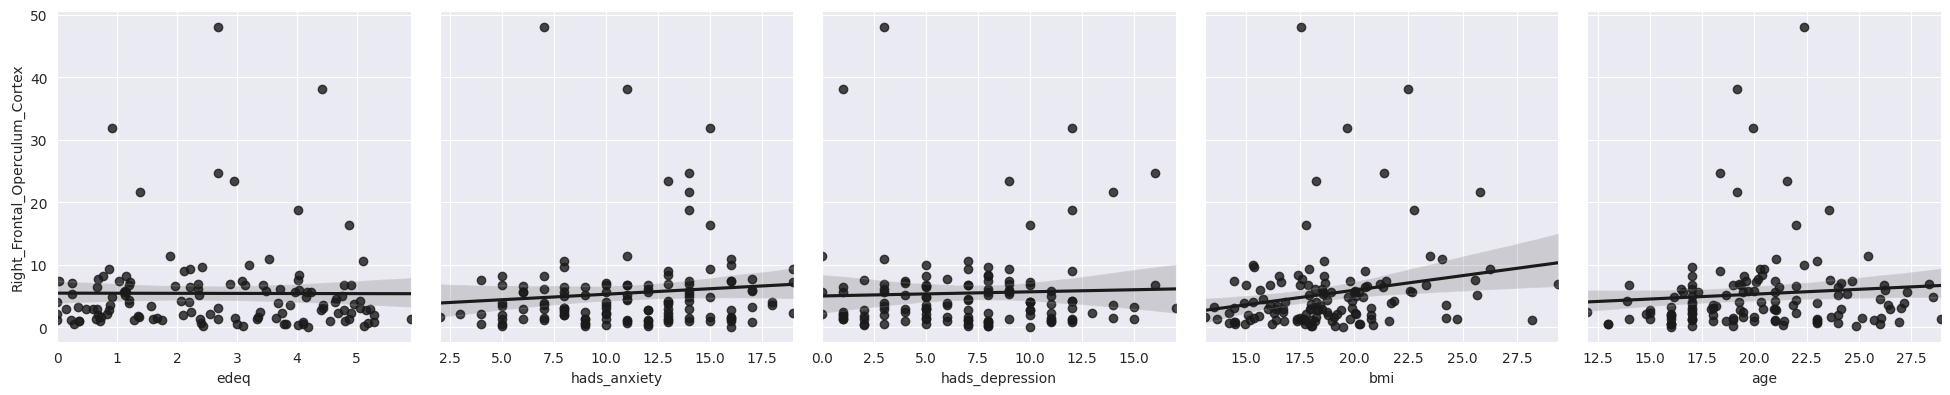

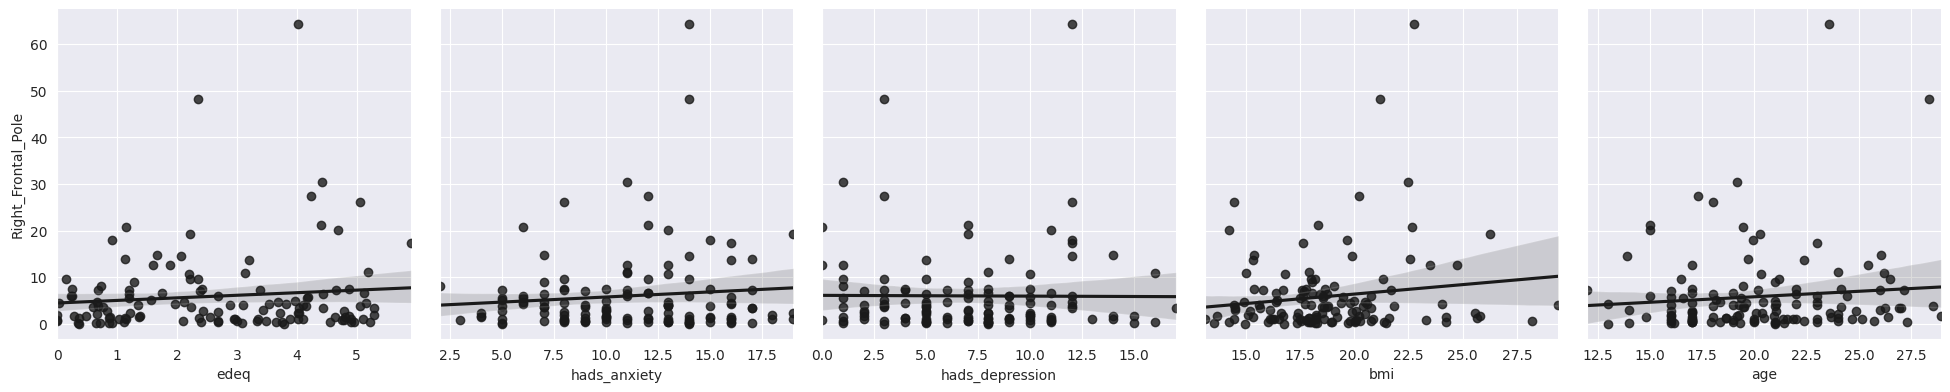

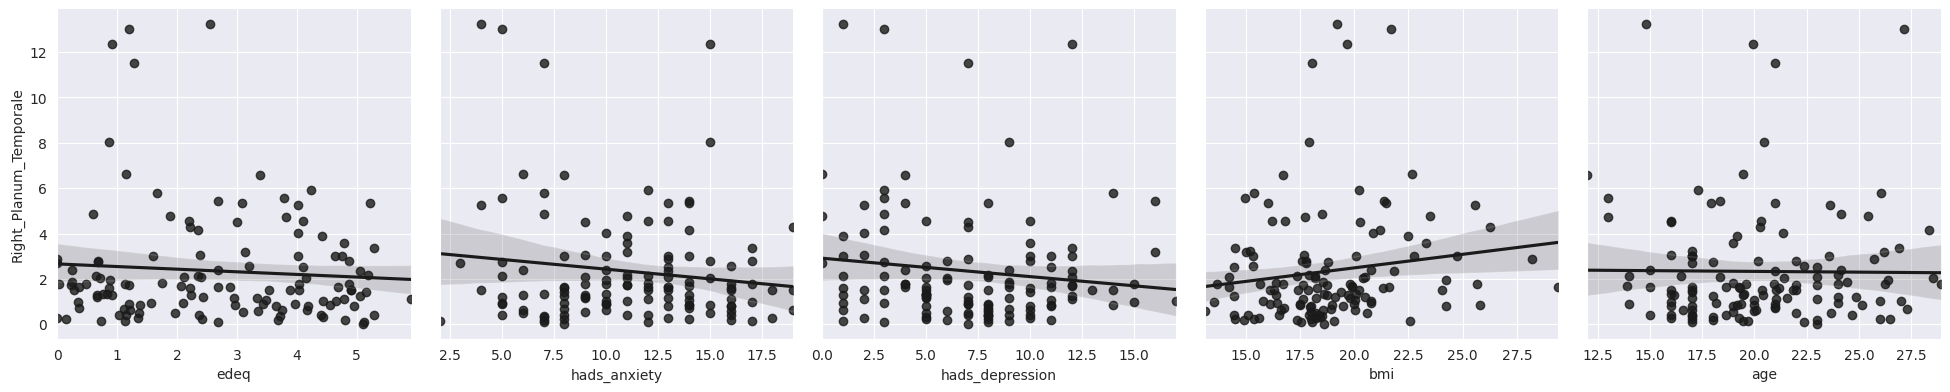

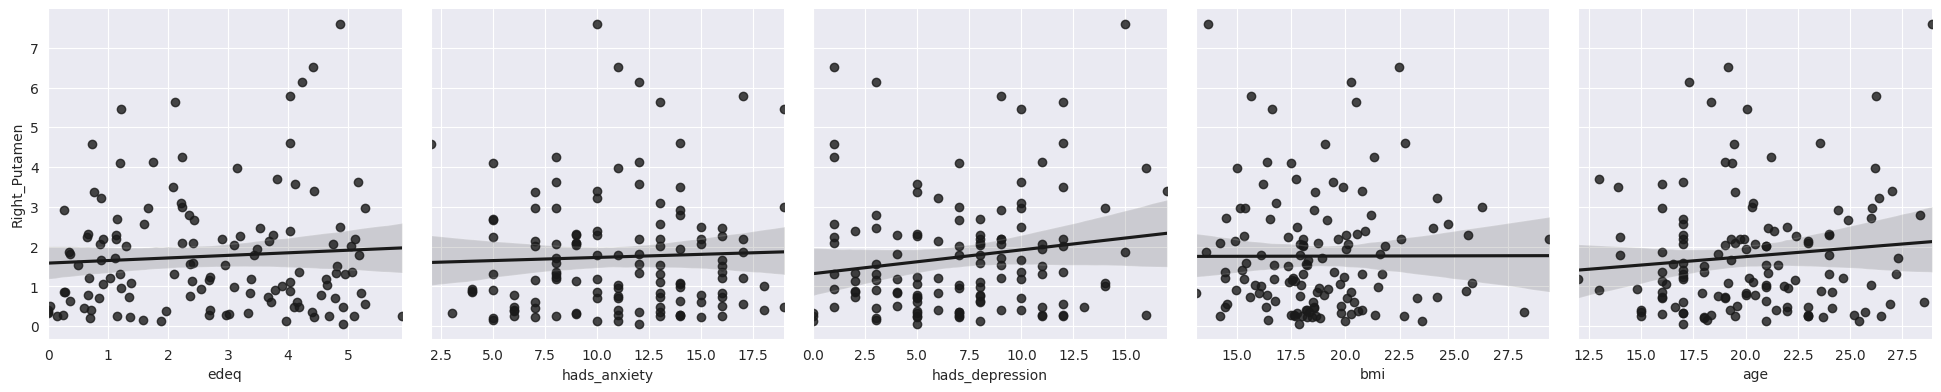

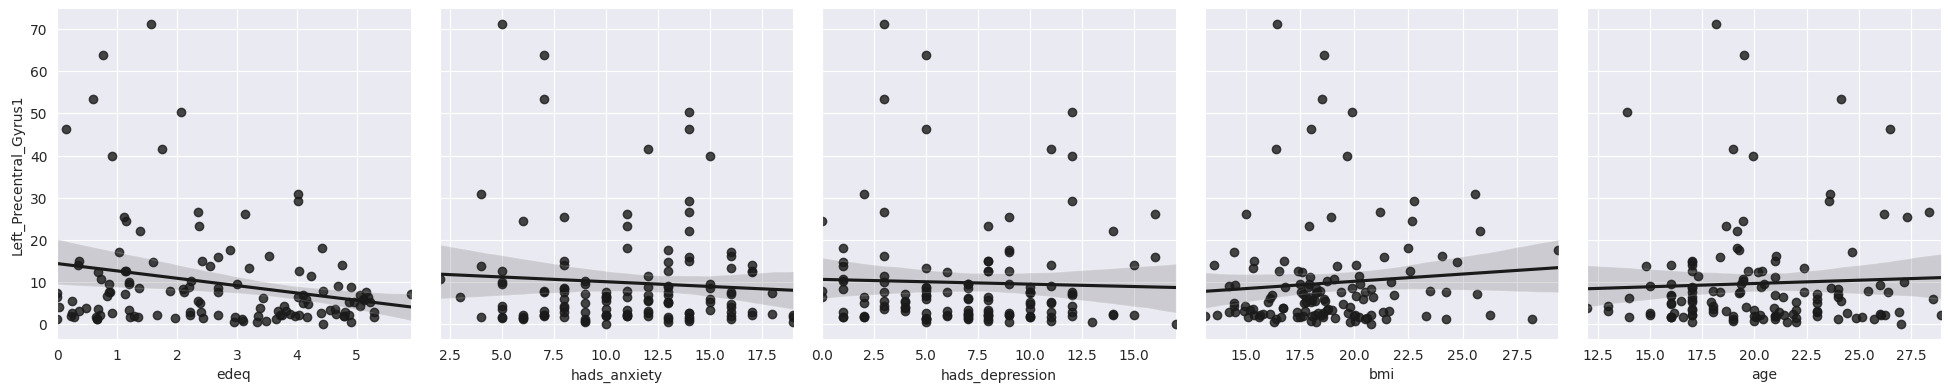

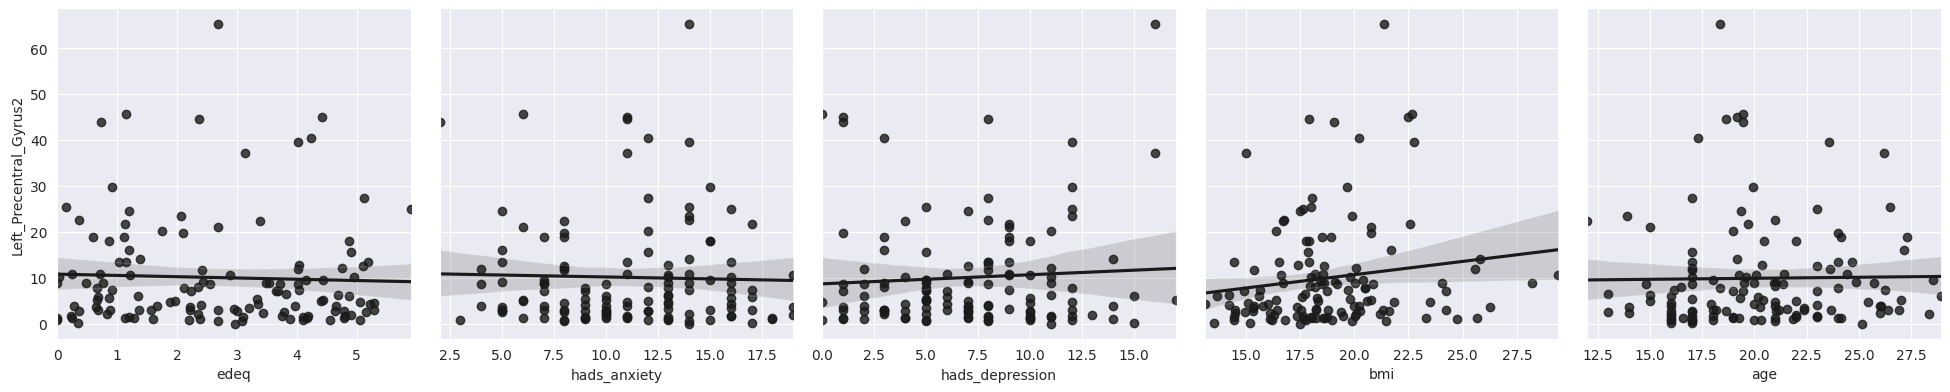

In [13]:
df = lmm['eft_interaction'][lmm['eft_interaction']['subject'].str.contains('G2')].reset_index(drop=True)
for cluster in lmm['eft_interaction'].drop(['subject', 'time_point', 'edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age', 'group', 'cluster_trans'],axis=1).columns:
    plots = sns.PairGrid(df, y_vars=[cluster], x_vars=['edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age'], height=4)
    plots.map(sns.regplot, color=".1")

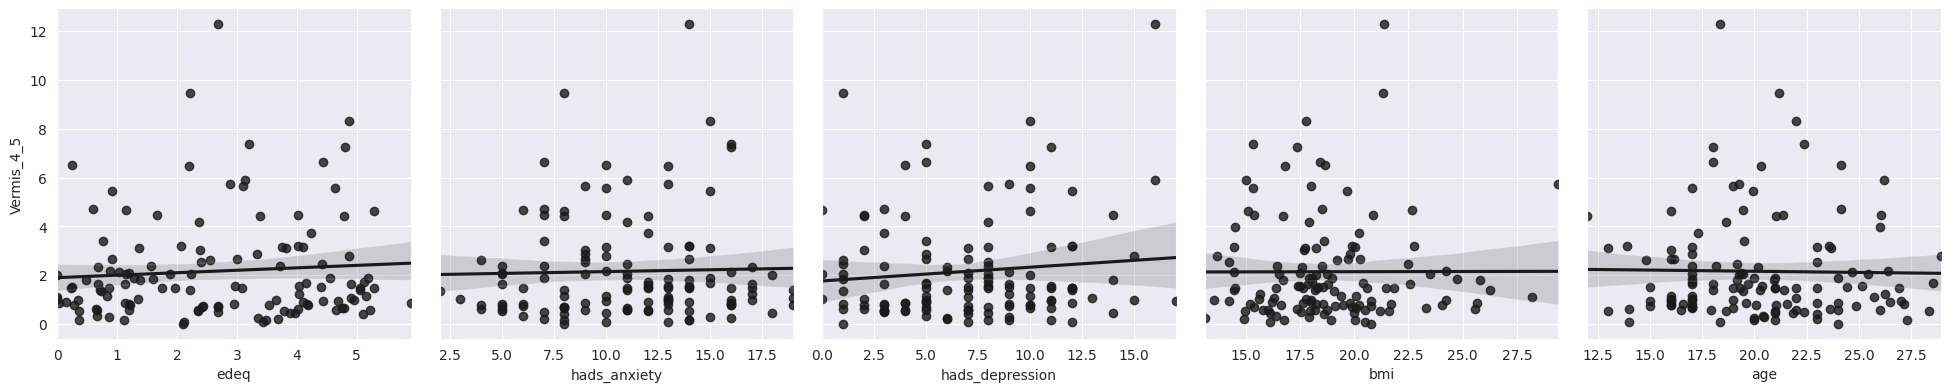

In [14]:
df = lmm['happy_interaction'][lmm['happy_interaction']['subject'].str.contains('G2')].reset_index(drop=True)
for cluster in lmm['happy_interaction'].drop(['subject', 'time_point', 'edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age', 'group', 'cluster_trans'],axis=1).columns:
    plots = sns.PairGrid(df, y_vars=[cluster], x_vars=['edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age',], height=4)
    plots.map(sns.regplot, color=".1")

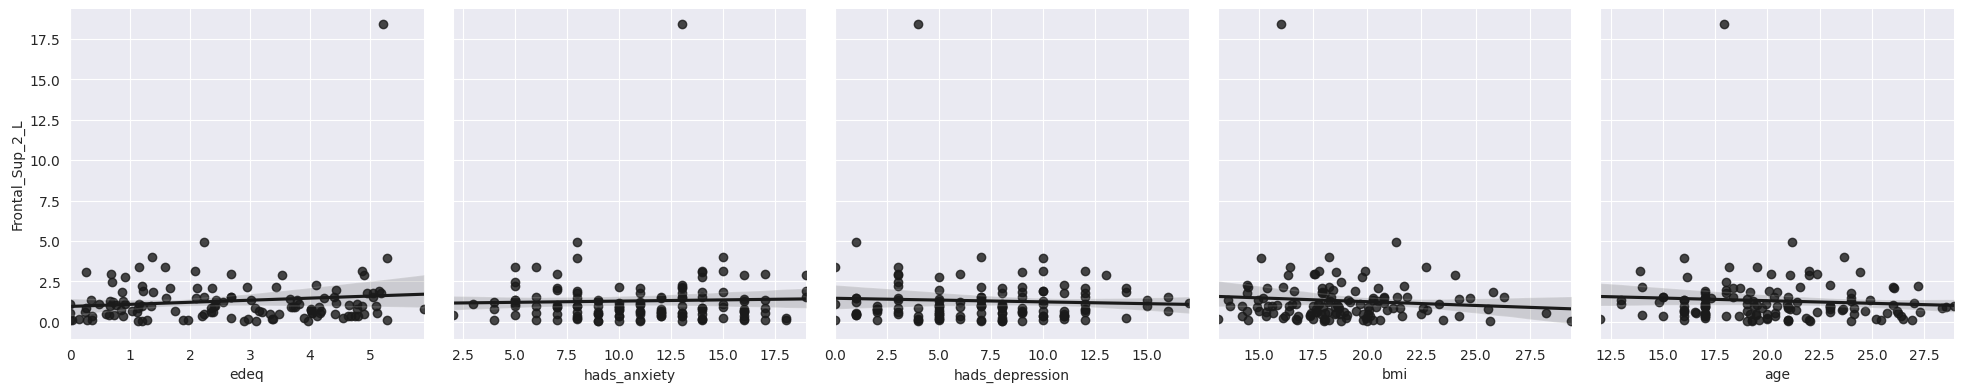

In [15]:
df = lmm['fear_time'][lmm['fear_time']['subject'].str.contains('G2')].reset_index(drop=True)
for cluster in lmm['fear_time'].drop(['subject', 'time_point', 'edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age', 'group', 'cluster_trans'],axis=1).columns:
    plots = sns.PairGrid(df, y_vars=[cluster], x_vars=['edeq', 'hads_anxiety', 'hads_depression', 'bmi', 'age',], height=4)
    plots.map(sns.regplot, color=".1")